<a href="https://colab.research.google.com/github/VirenderTanwar/Datasets/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing The Big Three packages(Pandas, Numpy, Matplotlib).
For better view i have enabled the dataframe formater.
I have changed the data table max column count to 11 beacuse data set is having 10 columns.

In [20]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.data_table import DataTable
DataTable.max_columns = 15
from google.colab import data_table
data_table.enable_dataframe_formatter()

For week3 Assignmnet professor has given data set of Bollywood Movie Detail dataset. Indian Cinema also known as Bollywood has witnessed exponential growth in terms of volume of business, manpower employed, number of movies produced each year and also the global reach. I have downloaded the data set from kaggle and uploaded in Github. Now we need to import the data set as pandas dataframe with below line of code.

In [29]:
movie = pd.read_csv("https://raw.githubusercontent.com/VirenderTanwar/Datasets/main/BollywoodMovieDetail.csv")
movie.head()

,imdbId,title,releaseYear,releaseDate,genre,writers,actors,directors,sequel,hitFlop
0,tt0118578,Albela,2001,20 Apr 2001,Romance,Honey Irani (screenplay) | Honey Irani (story)...,Govinda | Aishwarya Rai Bachchan | Jackie Shro...,Deepak Sareen,0.0,2
1,tt0169102,Lagaan: Once Upon a Time in India,2001,08 May 2002,Adventure | Drama | Musical,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Ashutosh Gowariker,0.0,6
2,tt0187279,Meri Biwi Ka Jawab Nahin,2004,02 Jul 2004,Action | Comedy,NaN,Akshay Kumar | Sridevi | Gulshan Grover | Laxm...,Pankaj Parashar | S.M. Iqbal,0.0,1
3,tt0222024,Hum Tumhare Hain Sanam,2002,24 May 2002,Drama | Romance,K.S. Adiyaman | Arun Kumar (assistant dialogue...,Shah Rukh Khan | Madhuri Dixit | Salman Khan |...,K.S. Adiyaman,0.0,4
4,tt0227194,One 2 Ka 4,2001,30 Mar 2001,Action | Comedy | Drama,Sanjay Chhel | Raaj Kumar Dahima (screenplay) ...,Shah Rukh Khan | Juhi Chawla | Jackie Shroff |...,Shashilal K. Nair,0.0,1


# Data Substitution


Here we can see that ReleaseDate, Genre, Writers, Actors, Directors and Sequel columns has missing values

In [30]:
movie.isnull().sum()

imdbId           0
title            0
releaseYear      0
releaseDate     53
genre            2
writers        119
actors           3
directors        4
sequel           3
hitFlop          0
dtype: int64

Here I am replacing the missing for these columns. We can see that there are no null values

In [31]:
movie['releaseDate'].fillna(movie['releaseDate'].mode()[0],inplace=True)
movie['genre'].fillna('Unknown',inplace=True)
movie['writers'].fillna('Unknown',inplace=True)
movie['actors'].fillna('Unknown',inplace=True)
movie['directors'].fillna('Unknown',inplace=True)
movie['sequel'].fillna(0,inplace=True)

movie.isnull().sum()

imdbId         0
title          0
releaseYear    0
releaseDate    0
genre          0
writers        0
actors         0
directors      0
sequel         0
hitFlop        0
dtype: int64

In [32]:
movie.nunique()

imdbId         1284
title          1284
releaseYear      14
releaseDate     710
genre           216
writers        1110
actors         1282
directors       732
sequel            3
hitFlop           9
dtype: int64

In [33]:
movie['writers_len']=movie['writers'].apply(lambda x:len(x.split("|")))
movie.writers_len.value_counts()

1     410
2     280
3     248
4     136
5     114
6      52
7      21
8      10
9       5
10      4
11      3
15      1
Name: writers_len, dtype: int64

Here we have substituted the null values for ReleaseDate, Genre, Writers, Actors, Directors and Sequel.
Have substituted the total number of writers into actual numbers

# Data Transformation

In [34]:
movie['genre_len']=movie['genre'].apply(lambda x:len(x.split("|")))
movie.genre_len.value_counts()

3    596
2    350
1    338
Name: genre_len, dtype: int64

In [36]:
movie['first_lead_actor'] = movie['actors'].apply(lambda x:x.split("|")[0])
movie['second_lead_actor'] = movie['actors'].apply(lambda x:x.split("|")[1] if len(x.split("|"))>1 else x.split("|")[0])
movie['main_director'] = movie['directors'].apply(lambda x:x.split("|")[0])

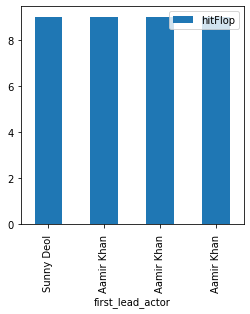

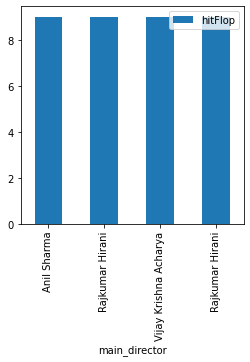

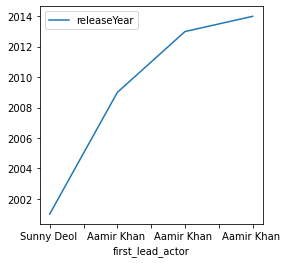

In [63]:
movie[movie['hitFlop']==9].plot(x='first_lead_actor',y=['hitFlop'],kind='bar',figsize=(4,4))
movie[movie['hitFlop']==9].plot(x='main_director',y=['hitFlop'],kind='bar',figsize=(4,4))
movie[movie['hitFlop']==9].plot(x='first_lead_actor',y=['releaseYear'],kind='line',figsize=(4,4))

In [64]:
pd.crosstab(movie[movie['hitFlop']>6].hitFlop,movie[movie['hitFlop']>6].genre_len)

genre_len,1,2,3
hitFlop,,,
7,2,7,20
8,1,5,14
9,0,1,3


Rajkumar Hirani          3
Rakesh Roshan            2
Rohit Shetty             2
Karan Johar              1
Siddique                 1
Mohit Suri               1
Ayan Mukherjee           1
Arbaaz Khan              1
Prabhudheva              1
Kabir Khan               1
Vijay Krishna Acharya    1
Abhinav Kashyap          1
Anees Bazmee             1
Anil Sharma              1
Aditya Chopra            1
A.R. Murugadoss          1
Farah Khan               1
Sooraj R. Barjatya       1
Sanjay Gadhvi            1
Sajid Nadiadwala         1
Name: main_director, dtype: int64


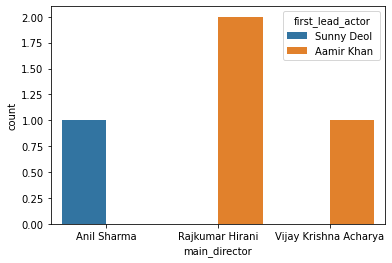

In [80]:
sns.countplot(x='main_director',hue='first_lead_actor',data=movie[movie['hitFlop']>8])
print(movie[movie['hitFlop']>7].main_director.value_counts())

Rajkumar Hirani          3
Rakesh Roshan            2
Rohit Shetty             2
Karan Johar              1
Siddique                 1
Mohit Suri               1
Ayan Mukherjee           1
Arbaaz Khan              1
Prabhudheva              1
Kabir Khan               1
Vijay Krishna Acharya    1
Abhinav Kashyap          1
Anees Bazmee             1
Anil Sharma              1
Aditya Chopra            1
A.R. Murugadoss          1
Farah Khan               1
Sooraj R. Barjatya       1
Sanjay Gadhvi            1
Sajid Nadiadwala         1
Name: main_director, dtype: int64


In [28]:
movie['first_lead_actor'] = movie['first_lead_actor'].astype('category')
movie['second_lead_actor'] = movie['second_lead_actor'].astype('category')
movie['first_lead_actor'] = movie['first_lead_actor'].cat.codes
movie['second_lead_actor'] = movie['second_lead_actor'].cat.codes
movie['main_director'] = movie['main_director'].astype('category')
movie['main_director'] = movie['main_director'].cat.codes
movie.loc[:,['genre_len','first_lead_actor','second_lead_actor','main_director','hitFlop']].head()

,genre_len,first_lead_actor,second_lead_actor,main_director,hitFlop
0,1,151,25,158,2
1,3,2,174,115,6
2,2,27,570,390,1
3,2,420,271,262,4
4,3,420,225,593,1


I have taken three columns i.e. genre actor, director as they play important role in the success of a movie.
In genre there 216 unique values which i am transforming it into number of Genre a movie is having.
From Actor column i am taking first and second lead actor as the lead actors. Then i have converted them to numbers using "cat.codes".
Extarcted the first main director and converted into number

# Data Reduction

In [10]:
movie['hitFlop'].describe()

count    1284.000000
mean        2.144081
std         1.812820
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: hitFlop, dtype: float64

In [37]:
bins = (np.linspace(movie.hitFlop.min(),movie.hitFlop.max(),4,dtype=int))
bins

array([1, 3, 6, 9])

In [38]:
labels = ['flop', 'average', 'hit']
movie['bins'] = pd.cut(movie['hitFlop'], bins=bins,labels=labels,include_lowest=True)
movie.head()

,imdbId,title,releaseYear,releaseDate,genre,writers,actors,directors,sequel,hitFlop,writers_len,genre_len,first_lead_actor,second_lead_actor,main_director,bins
0,tt0118578,Albela,2001,20 Apr 2001,Romance,Honey Irani (screenplay) | Honey Irani (story)...,Govinda | Aishwarya Rai Bachchan | Jackie Shro...,Deepak Sareen,0.0,2,3,1,Govinda,Aishwarya Rai Bachchan,Deepak Sareen,flop
1,tt0169102,Lagaan: Once Upon a Time in India,2001,08 May 2002,Adventure | Drama | Musical,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Ashutosh Gowariker,0.0,6,5,3,Aamir Khan,Gracy Singh,Ashutosh Gowariker,average
2,tt0187279,Meri Biwi Ka Jawab Nahin,2004,02 Jul 2004,Action | Comedy,Unknown,Akshay Kumar | Sridevi | Gulshan Grover | Laxm...,Pankaj Parashar | S.M. Iqbal,0.0,1,1,2,Akshay Kumar,Sridevi,Pankaj Parashar,flop
3,tt0222024,Hum Tumhare Hain Sanam,2002,24 May 2002,Drama | Romance,K.S. Adiyaman | Arun Kumar (assistant dialogue...,Shah Rukh Khan | Madhuri Dixit | Salman Khan |...,K.S. Adiyaman,0.0,4,4,2,Shah Rukh Khan,Madhuri Dixit,K.S. Adiyaman,average
4,tt0227194,One 2 Ka 4,2001,30 Mar 2001,Action | Comedy | Drama,Sanjay Chhel | Raaj Kumar Dahima (screenplay) ...,Shah Rukh Khan | Juhi Chawla | Jackie Shroff |...,Shashilal K. Nair,0.0,1,3,3,Shah Rukh Khan,Juhi Chawla,Shashilal K. Nair,flop


In [13]:
movie.groupby(['bins']).count()

,imdbId,title,releaseYear,releaseDate,genre,writers,actors,directors,sequel,hitFlop,writers_len,genre_len,first_lead_actor,second_lead_actor,main_director
bins,,,,,,,,,,,,,,,
flop,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041
average,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190
hit,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53


(array([1041.,  190.,   53.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <a list of 3 Patch objects>)

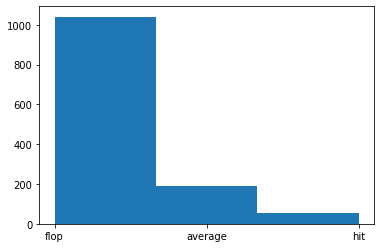

In [14]:
plt.hist(movie['bins'], bins=3)

In [15]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

movie.loc[:,['writers_len','genre_len','first_lead_actor','second_lead_actor','main_director']] = min_max_scaler.fit_transform(movie.loc[:,['writers_len','genre_len','first_lead_actor','second_lead_actor','main_director']])
movie.head()

,imdbId,title,releaseYear,releaseDate,genre,writers,actors,directors,sequel,hitFlop,writers_len,genre_len,first_lead_actor,second_lead_actor,main_director,bins
0,tt0118578,Albela,2001,20 Apr 2001,Romance,Honey Irani (screenplay) | Honey Irani (story)...,Govinda | Aishwarya Rai Bachchan | Jackie Shro...,Deepak Sareen,0.0,2,0.142857,0.0,0.285985,0.037821,0.216142,flop
1,tt0169102,Lagaan: Once Upon a Time in India,2001,08 May 2002,Adventure | Drama | Musical,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Ashutosh Gowariker,0.0,6,0.285714,1.0,0.003788,0.263238,0.157319,average
2,tt0187279,Meri Biwi Ka Jawab Nahin,2004,02 Jul 2004,Action | Comedy,Unknown,Akshay Kumar | Sridevi | Gulshan Grover | Laxm...,Pankaj Parashar | S.M. Iqbal,0.0,1,0.000000,0.5,0.051136,0.862330,0.533516,flop
3,tt0222024,Hum Tumhare Hain Sanam,2002,24 May 2002,Drama | Romance,K.S. Adiyaman | Arun Kumar (assistant dialogue...,Shah Rukh Khan | Madhuri Dixit | Salman Khan |...,K.S. Adiyaman,0.0,4,0.214286,0.5,0.795455,0.409985,0.358413,average
4,tt0227194,One 2 Ka 4,2001,30 Mar 2001,Action | Comedy | Drama,Sanjay Chhel | Raaj Kumar Dahima (screenplay) ...,Shah Rukh Khan | Juhi Chawla | Jackie Shroff |...,Shashilal K. Nair,0.0,1,0.142857,1.0,0.795455,0.340393,0.811218,flop


Created a bins for hitFlop column to categorise and see what percent of movies are hit,average & flop.
Normalizing the numberic columns created during data transformation and data substitution as the all the values will be between 0 to 1. This will help in reducing the time in training the module.

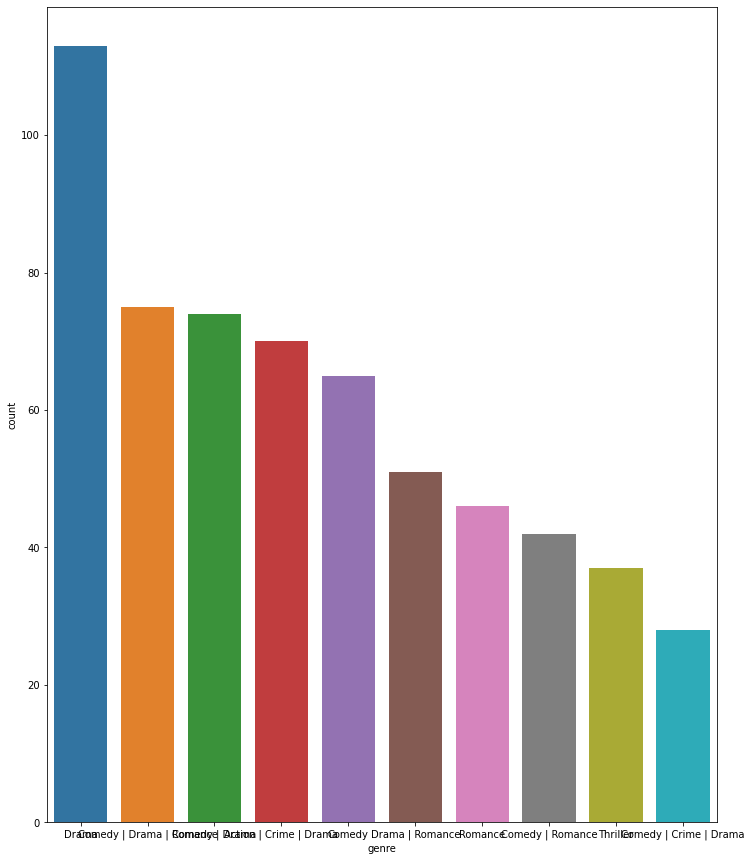

In [16]:
plt.figure(figsize = (12,15))
ax = plt.axes()
ax.set(facecolor = 'white')
ax.grid(False)

sns.countplot(data = movie,x = 'genre',order = movie['genre'].value_counts().index[0:10])

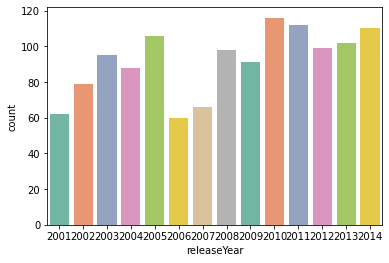

In [17]:
sns.countplot(data = movie,x = 'releaseYear',palette = 'Set2')

In [40]:
hit_movie = movie[movie['hitFlop']>=6]
hit_movie.shape

(117, 16)

From the Exploratory Data analysis we can see for a hit movie there has to be a multiple genre i.e. combinationation of 3 genre. We have also seen that Rajkumar hirani is successful movie director give super hit movie and the combination of Rajkumar Hirani & Amir Khan have procuded a hit movie more than one time.